#### Making a corner plot of samples from the main flow, with RA and Dec added with the conditional flow.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import corner
from pzflow import Flow

In [2]:
# plotting style
plt.style.use('../paper.mplstyle')
twocol = 7.1014
onecol = 3.35
mpl.rcParams['xtick.top'] = False 
mpl.rcParams['xtick.bottom'] = False 
mpl.rcParams['ytick.left'] = False
mpl.rcParams['ytick.right'] = False 
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [3]:
flow = Flow(file="saved-flows/desc-dc2-dr6-redshift-flow.pkl")
cflow = Flow(file="saved-flows/desc-dc2-dr6-conditional-position-flow.pkl")

In [4]:
samples = flow.sample(10000, seed=0)
positions = cflow.sample(1, 
                         conditions=cflow.info["condition_scaler"](samples),
                         save_conditions=False,
                         seed=0)
samples["ra"] = positions["ra"]
samples["dec"] = positions["dec"]
del positions
samples

,redshift,u,g,r,i,z,y,ra,dec
0,1.388970,25.205338,25.322300,25.320980,25.187008,24.987610,24.467880,69.938065,-30.245613
1,2.322452,27.287342,26.655264,26.529745,26.580147,26.504519,26.393322,63.908375,-41.781242
2,1.297174,27.490154,26.927425,26.296688,25.498829,24.810963,24.119022,61.680214,-44.173679
3,0.499338,27.928930,25.383530,23.807358,22.928213,22.534876,22.311203,54.834240,-39.495758
4,0.573433,28.380209,27.788794,26.790775,26.392422,26.327360,26.267324,69.569702,-44.117104
...,...,...,...,...,...,...,...,...,...
9995,2.253279,23.405163,23.252060,23.255863,23.337811,23.418049,23.378983,68.986679,-33.022736
9996,1.320440,26.049063,26.073114,26.156893,26.159025,25.916214,25.569468,59.055782,-30.480083
9997,1.663376,25.537622,25.485327,25.713137,25.477798,25.393440,25.174520,58.412308,-43.952812
9998,0.761681,27.749304,27.302784,26.512281,25.556011,25.369713,25.280663,54.792610,-34.332024


In [5]:
data = pd.read_pickle("dc2.pkl")
data = data[:samples.shape[0]]
data = data[["redshift", "u", "g", "r", "i", "z", "y", "ra", "dec"]]

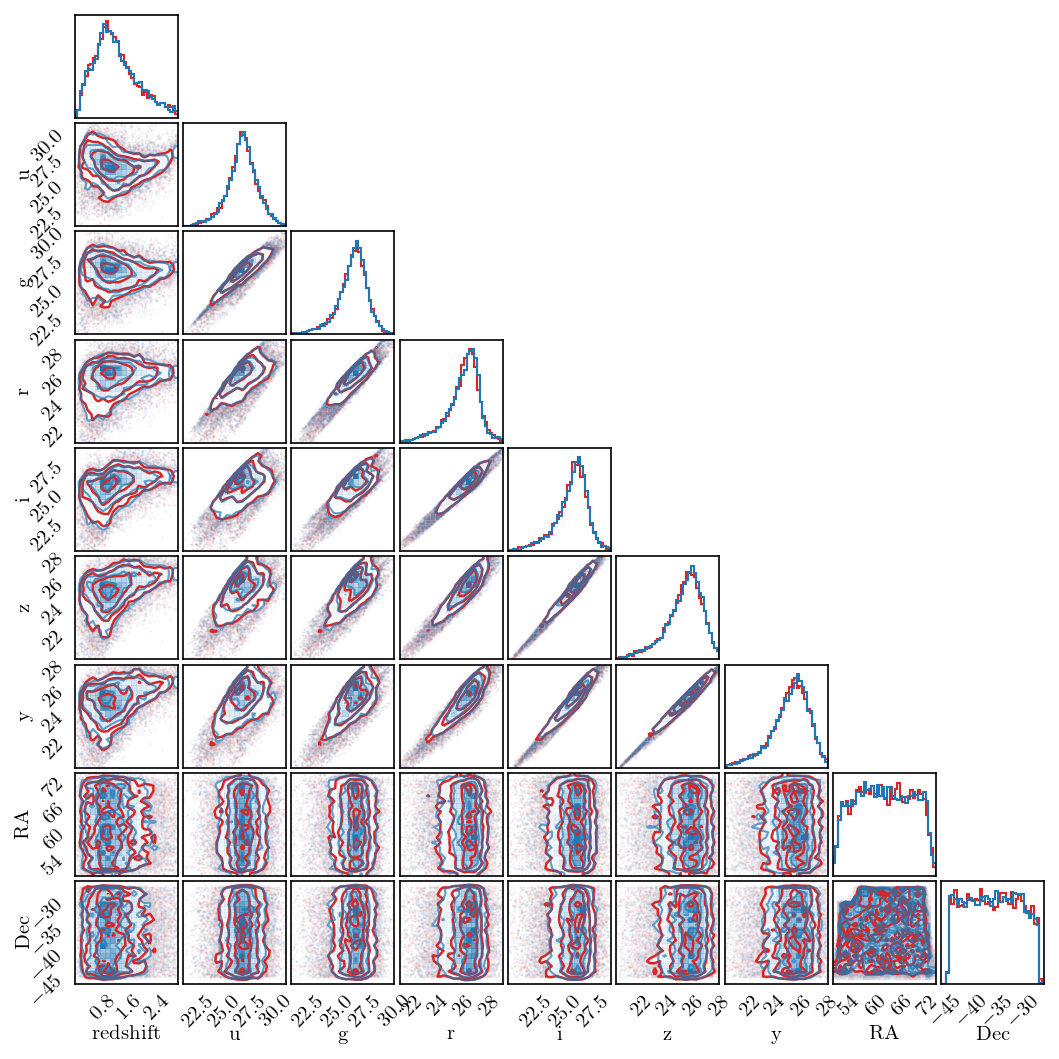

In [6]:
fig = plt.figure(figsize=(twocol, twocol))

ranges = [(0, 3), # redshift
          (21, 31), (21, 30), (21, 29), (20, 29), (20, 28), (20, 28), # mags
          (50, 74), (-46, -26)] # position

corner.corner(samples, fig=fig, color='C3', bins=20, range=ranges, hist_bin_factor=2, data_kwargs={'ms':1}, contour_kwargs={'linewidths':1.2})

corner.corner(data, fig=fig, range=ranges, bins=20, hist_bin_factor=2, color='C0', data_kwargs={'ms':1}, contour_kwargs={'linewidths':1, 'alpha':0.7},
              labels=["redshift", "u", "g", "r", "i", "z", "y", "RA", "Dec"], max_n_ticks=4, labelpad=0.1)

plt.subplots_adjust(left=0.07, bottom=0.07)
fig.savefig("figures/flow-corner.pdf")